# Main Command
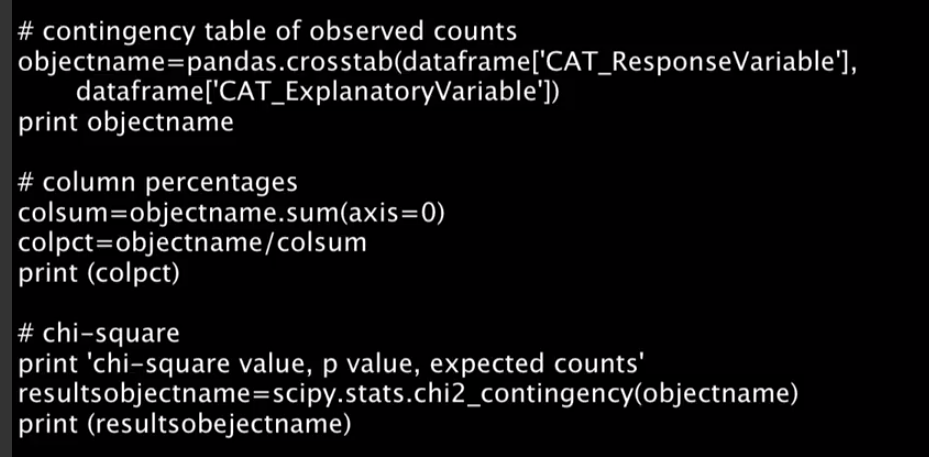

In [1]:
import numpy as np
import pandas as pd

## load data
data = pd.read_csv("E:/Jupyter/DATA _ANALYST/Data_Management_and_Visualization/data/addhealth.csv", low_memory=False)
pd.set_option("display.float_format", lambda x: '%f'%x)
## convert column names to upper case
data.columns = map(str.upper, data.columns)

In [2]:
## only keep the variables that will be analysis
sub1 = data[['AID', 'H1GH2', 'H1ED1', 'H1ED2', 'H1GI1Y']]
sub2 = sub1[(sub1['H1GI1Y'] >= 80)]
sub = sub2.copy()
sub.head()

,AID,H1GH2,H1ED1,H1ED2,H1GI1Y
5,57104649,1,2,0,81
6,57104676,0,1,0,83
7,57109625,1,3,4,81
8,57110897,1,2,10,81
9,57111071,2,2,0,81


In [3]:
## convert object to numeric
sub['H1GH2'] = pd.to_numeric(sub['H1GH2'], errors='coerce')
sub['H1ED1'] = pd.to_numeric(sub['H1ED1'], errors='coerce')
sub['H1ED2'] = pd.to_numeric(sub['H1ED2'], errors='coerce')

In [4]:
## coding out missing data
sub['H1GH2'] = sub['H1GH2'].replace([6,8], np.nan)
sub['H1ED1'] = sub['H1ED1'].replace([6, 7, 8, 9], np.nan)
sub['H1ED2'] = sub['H1ED2'].replace([996, 997, 998], np.nan)

In [5]:
## create secondary variables
def times_skip(row):
    if row['H1ED1']==0:
        return 0
    elif row['H1ED1']==1:
        return 2
    elif row['H1ED1']==2:
        return 7
    elif row['H1ED1']==3:
        return 45
    else:
        return np.nan
    
sub['SKIPFREQ'] = sub.apply(lambda row: times_skip(row), axis=1)

In [6]:
def total_skip(row):
    if row['SKIPFREQ'] != np.nan and row['H1ED2'] != np.nan:
        return row['SKIPFREQ']+row['H1ED2']
    elif row['SKIPFREQ'] == np.nan and row['H1ED2'] != np.nan:
        return row['H1ED2']
    elif row['SKIPFREQ'] != np.nan and row['H1ED2'] == np.nan:
        return row['SKIPFREQ']
    else:
        return np.nan
    
sub['SKIPTOTAL'] = sub.apply(lambda row: total_skip(row), axis=1)

In [7]:
def cat_skip(row):
    if row['SKIPTOTAL'] < 7:
        return 0
    elif row['SKIPTOTAL'] >= 7:
        return 1
    else:
        return np.nan
    
sub['SKIPCAT'] = sub.apply(lambda row: cat_skip(row), axis=1)

In [8]:
sub['SKIPCAT'].value_counts(dropna=False)

1.000000    1479
0.000000    1066
nan           29
Name: SKIPCAT, dtype: int64

In [13]:
import scipy.stats as ss

# Categorical response /  Categorical explanatory
# observed counts in each level
ct1 = pd.crosstab(sub['SKIPCAT'], sub['H1GH2'])
ct1

H1GH2,0.0,1.0,2.0,3.0,4.0
SKIPCAT,,,,,
0.000000,117,701,195,46,7
1.000000,108,898,362,94,17


In [14]:
# column percentage
colsum = ct1.sum(axis = 0)
colpct = ct1 / colsum
colpct

H1GH2,0.0,1.0,2.0,3.0,4.0
SKIPCAT,,,,,
0.000000,0.520000,0.438399,0.350090,0.328571,0.291667
1.000000,0.480000,0.561601,0.649910,0.671429,0.708333


In [16]:
# chi-square
print("x^2 value, p-value, expected counts")
cs1 = ss.chi2_contingency(ct1)
cs1

x^2 value, p-value, expected counts


(29.068918108503205,
 7.569388046289411e-06,
 4,
 array([[ 94.24361493, 669.75795678, 233.30530452,  58.64047151,
          10.05265226],
        [130.75638507, 929.24204322, 323.69469548,  81.35952849,
          13.94734774]]))

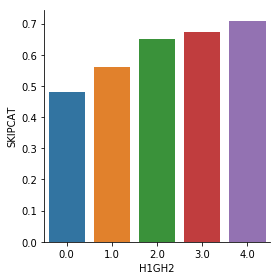

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sub['H1GH2'] = sub['H1GH2'].astype("category")

ax = sns.factorplot(x='H1GH2', y='SKIPCAT', data=sub, kind='bar', ci=None)
ax

In [23]:
record1 = {0: 0, 1: 1}
sub['PAIR01'] = sub['H1GH2'].map(record1)

ctp1 = pd.crosstab(sub['SKIPCAT'], sub['PAIR01'])
ctp1

PAIR01,0.0,1.0
SKIPCAT,,
0.000000,117,701
1.000000,108,898


In [24]:
# column percentage
colsum1 = ctp1.sum(axis = 0)
colpct1 = ctp1 / colsum
colpct1

,0.0,1.0,2.0,3.0,4.0
SKIPCAT,,,,,
0.000000,0.520000,0.438399,nan,nan,nan
1.000000,0.480000,0.561601,nan,nan,nan


In [26]:
# chi-square
print("x^2 value, p-value, expected counts")
ch1 = ss.chi2_contingency(ctp1)
ch1

x^2 value, p-value, expected counts


(4.9852274666518985,
 0.025564623950863053,
 1,
 array([[100.90460526, 717.09539474],
        [124.09539474, 881.90460526]]))

In [29]:
record2 = {0: 0, 3: 3}
sub['PAIR03'] = sub['H1GH2'].map(record2)

ctp2 = pd.crosstab(sub['SKIPCAT'], sub['PAIR03'])
ctp2

PAIR03,0.0,3.0
SKIPCAT,,
0.000000,117,46
1.000000,108,94


In [30]:
# column percentage
colsum2 = ctp2.sum(axis = 0)
colpct2 = ctp2 / colsum
colpct2

,0.0,1.0,2.0,3.0,4.0
SKIPCAT,,,,,
0.000000,0.520000,nan,nan,0.328571,nan
1.000000,0.480000,nan,nan,0.671429,nan


In [31]:
# chi-square
print("x^2 value, p-value, expected counts")
ch2 = ss.chi2_contingency(ctp2)
ch2

x^2 value, p-value, expected counts


(12.03327377818851,
 0.0005225920921165902,
 1,
 array([[100.47945205,  62.52054795],
        [124.52054795,  77.47945205]]))